In [1]:
import numpy as np

def transition_matrix(k):
    num_states = 2 * k + 1
    P = np.zeros((num_states, num_states))

    for i in range(num_states):
        if i == 0:
            P[i][i + 1] = 1
        elif i == num_states - 1:
            P[i][i - 1] = 1
        else:
            P[i][i - 1] = 0.5
            P[i][i + 1] = 0.5

    return P


In [2]:
# Test for k = 2
k = 2
P = transition_matrix(k)
print(P)

[[0.  1.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0. ]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  0.5 0.  0.5]
 [0.  0.  0.  1.  0. ]]


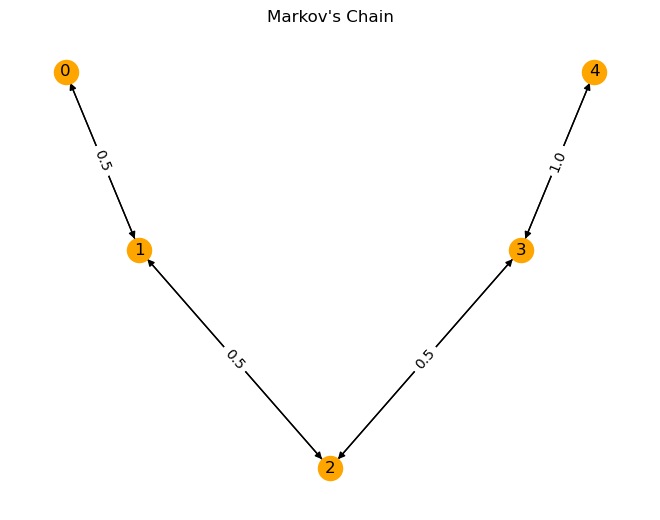

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

gP = nx.from_numpy_array(P, create_using=nx.DiGraph)
#g = nx.DiGraph(gd) # dictionary to graph
def plot_gph(g):
    pos = nx.spectral_layout(g)
    nx.draw(g, pos, with_labels=True, node_color='orange')
    labels = nx.get_edge_attributes(g, 'weight')
    nx.draw_networkx_edge_labels(g, pos, edge_labels=labels)

plt.figure()
plot_gph(gP)
plt.title("Markov's Chain")
plt.show()

A Markov chain is irreducible if there is a positive probability of reaching any state from any other state. In this case, if we  start with any number of balls in the first urn, it's possible to reach any other number of balls in the first urn through the experiment. Therefore, P is irreducible.

The limit of $P^n$ as n → ∞ depends on the initial distribution.

In [4]:
def stat_distribution(transition_matrix):
    eigvals, eigvecs = np.linalg.eig(transition_matrix.T)
    return eigvecs[:, 0] / eigvecs[:, 0].sum()

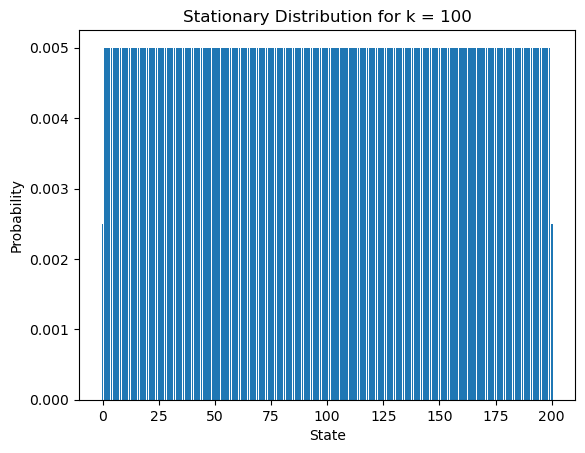

In [5]:
k = 100
stationary = stat_distribution(transition_matrix(k))
states = np.arange(2 * k + 1)

plt.figure()
plt.bar(states, stationary)
plt.title(f"Stationary Distribution for k = {k}")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()